In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data, io, filters, color, exposure
from skimage.transform import rotate
import re
import os
import re
import shutil

In [2]:
elispe_path='/Volumes/TOSHIBA EXT/Projects/Datasets/dataset_for_3D_reconstruction/image'


In [10]:
def copy_files_by_pattern(directory_path, destination_path, regex_pattern):
    """
    Copies files from the source directory to the destination directory based on a regex pattern.

    Args:
    directory_path (str): Path to the directory containing the files.
    destination_path (str): Directory where the copies will be stored.
    regex_pattern (str): Regular expression pattern to match filenames.

    Returns:
    None
    """
    # Compile the regex pattern
    pattern = re.compile(regex_pattern)

    # Create the destination folder if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    # Initialize a counter for copied files
    copied_files_count = 0

    # Loop through all files in the directory
    for filename in os.listdir(directory_path):
        # Check if the filename matches the pattern
        if pattern.match(filename):
            # Path of the current file
            current_file_path = os.path.join(directory_path, filename)
            # Path where the file will be copied
            destination_file_path = os.path.join(destination_path, filename)
            # Copy the file
            shutil.copy2(current_file_path, destination_file_path)
            copied_files_count += 1
            print(f'Copied: {filename}')

    # Print the result
    print(f'All matching files have been copied to {destination_path}. Total files copied: {copied_files_count}')




In [11]:
cell_types = [
    "spherocyte",
    "echinocyte",
    "keratocytes",
    "multilobate_cells",
    "cell_clusters",
    "knizocytes",
    "multilobate_cells",
    "acanthocytes",
    "stomatocyte"
]

In [12]:
for cell_type in cell_types:
    directory_path = elispe_path
    destination_path = elispe_path + '/' + cell_type
    regex_pattern = rf'.*{cell_type}.*\.tif$'

    copy_files_by_pattern(directory_path, destination_path, regex_pattern)

Copied: -1.00_spherocyte000043.tif
Copied: -1.00_spherocyte000044.tif
Copied: -1.00_spherocyte000045.tif
Copied: -1.00_spherocyte000046.tif
Copied: -1.00_spherocyte000047.tif
Copied: -1.00_spherocyte000048.tif
Copied: -1.00_spherocyte000049.tif
Copied: -1.00_spherocyte000050.tif
Copied: -1.00_spherocyte000051.tif
Copied: -1.00_spherocyte000052.tif
Copied: -1.00_spherocyte000053.tif
Copied: -1.00_spherocyte000054.tif
Copied: -1.00_spherocyte000055.tif
Copied: -1.00_spherocyte000056.tif
Copied: -1.00_spherocyte000057.tif
Copied: -1.00_spherocyte000058.tif
Copied: -1.00_spherocyte000059.tif
Copied: -1.00_spherocyte000060.tif
Copied: -1.00_spherocyte000061.tif
Copied: -1.00_spherocyte000062.tif
Copied: -1.00_spherocyte000063.tif
Copied: -1.00_spherocyte000064.tif
Copied: -1.00_spherocyte000065.tif
Copied: -1.00_spherocyte000066.tif
Copied: -1.00_spherocyte000067.tif
Copied: -1.00_spherocyte000068.tif
Copied: -1.00_spherocyte000069.tif
Copied: -1.00_spherocyte000070.tif
Copied: -1.00_sphero

In [6]:
import os
acanthocytes_path = elispe_path + '/Class/acanthocytes'
cell_clusters_path = elispe_path + '/Class/cell_clusters'
echino_path = elispe_path + '/Class/echinocyte'
keratocytes_path = elispe_path + '/Class/keratocytes'
knizocytes_path = elispe_path + '/Class/knizocytes'
multilobate_path = elispe_path + '/Class/multilobate_cells'
sphero_path = elispe_path + '/Class/spherocyte'
stomatocytes_path = elispe_path + '/Class/stomatocyte'


In [7]:
def find_num_files(path):
    num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
    return num_files


In [8]:
print(find_num_files(acanthocytes_path))
print(find_num_files(cell_clusters_path))
print(find_num_files(echino_path))
print(find_num_files(keratocytes_path))
print(find_num_files(multilobate_path))
print(find_num_files(stomatocytes_path))
print(find_num_files(sphero_path))

88
69
292
31
12
41
93


In [9]:
# Initialize an empty list to store images
# Path to the directory where your .tif files are stored


# List all files in the directory
all_files = os.listdir(elispe_path)

# Filter out the list to only .tif files
tif_files = [file for file in all_files if file.endswith('.tif')]



images = []

# Loop through all the .tif files
for file_name in tif_files:
    # Construct the full file path
    file_path = os.path.join(elispe_path, file_name)
    
    # Open the image file
    img = Image.open(file_path)
    
    # You can now work with the image (img), for example, display it, or add it to the list
    images.append(img)


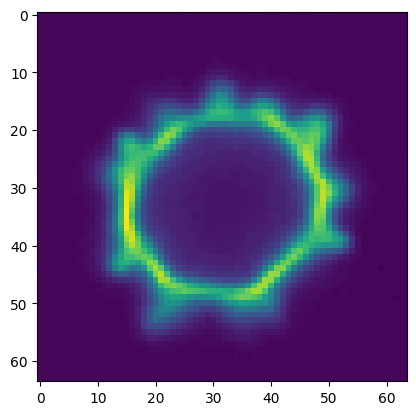

In [10]:
import matplotlib.pyplot as plt

# Display the first image as a test
plt.imshow(images[500])
plt.show()


In [11]:
from PIL import ImageStat

# Initialize lists to store image properties
dimensions = []
mean_colors = []
stddev_colors = []

# Loop through all the images
for img in images:
    # Get image dimensions
    dimensions.append(img.size)

    # Get mean and stddev of color intensities
    stat = ImageStat.Stat(img)
    mean_colors.append(stat.mean)
    stddev_colors.append(stat.stddev)

# Now you can analyze the lists `dimensions`, `mean_colors`, and `stddev_colors`
# For example, you can calculate the average dimensions, or plot the color intensities

In [12]:
import numpy as np

# Convert list of tuples to numpy array
dimensions_array = np.array(dimensions)

# Calculate average width and height
avg_width = np.mean(dimensions_array[:, 0])
avg_height = np.mean(dimensions_array[:, 1])

print(f'Average Width: {avg_width}, Average Height: {avg_height}')

Average Width: 64.0, Average Height: 64.0


In [13]:
print(mean_colors[:5])

[[60.517822265625], [47.898193359375], [97.77490234375], [68.89599609375], [66.377685546875]]
